<a href="https://colab.research.google.com/github/Ruiz0430/Audiobook-Data-Analysis/blob/main/Hw4_CAP4773.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 4

Daniel Ruiz

April 29th, 2024

CAP 4773

# Step 1: Problem Understanding

[link to database](https://www.kaggle.com/datasets/rutujab99/audiobookappdata?select=Audiobooks_data.csv)

 Description:

The data set contains data sourced from an audiobook application. Each customer in the database has made a purchase atleast once.The data represents two years worth of engagement. One can predict if the customer will make a purchase again from the audiobook company. The main idea is that the company shouldn't spend its advertising budget targeting individuals who are unlikely to come back. If we can focus our efforts on customers likely to convert again, we can obtain improved sales and profitability figures.


In [ ]:
#library imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score, davies_bouldin_score, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.pipeline import Pipeline

#Load dataset into dataframe
data = pd.read_csv("/content/drive/MyDrive/Audiobooks_data.csv")

print(data.head(n=10)) #display first 10 rows


      ID  Booklength_overall (mins)  Booklength_avg (mins)  Price_overall  \
0    994                     1620.0                   1620          19.73   
1   1143                     2160.0                   2160           5.33   
2   2059                     2160.0                   2160           5.33   
3   2882                     1620.0                   1620           5.96   
4   3342                     2160.0                   2160           5.33   
5   3416                     2160.0                   2160           4.61   
6   4949                     2160.0                   2160           5.33   
7   9011                      648.0                    648           5.33   
8   9282                     2160.0                   2160           5.33   
9  10500                     2160.0                   2160           5.33   

   Price_avg  Review  Review 10/10  Minutes_listened  Completion  \
0      19.73       1         10.00              0.99      1603.8   
1       5.33    

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 14084 non-null  int64  
 1   Booklength_overall (mins)          14084 non-null  float64
 2   Booklength_avg (mins)              14084 non-null  int64  
 3   Price_overall                      14084 non-null  float64
 4   Price_avg                          14084 non-null  float64
 5   Review                             14084 non-null  int64  
 6   Review 10/10                       14084 non-null  float64
 7   Minutes_listened                   14084 non-null  float64
 8   Completion                         14084 non-null  float64
 9   Support Request                    14084 non-null  int64  
 10  Last visited minus first purchase  14084 non-null  int64  
 11  Targets                            14084 non-null  int

In [ ]:
print(data.dropna())
print(data.describe())

          ID  Booklength_overall (mins)  Booklength_avg (mins)  Price_overall  \
0        994                     1620.0                   1620          19.73   
1       1143                     2160.0                   2160           5.33   
2       2059                     2160.0                   2160           5.33   
3       2882                     1620.0                   1620           5.96   
4       3342                     2160.0                   2160           5.33   
...      ...                        ...                    ...            ...   
14079  28220                     1620.0                   1620           5.33   
14080  28671                     1080.0                   1080           6.55   
14081  31134                     2160.0                   2160           6.14   
14082  32832                     1620.0                   1620           5.33   
14083    251                     1674.0                   3348           5.33   

       Price_avg  Review  R

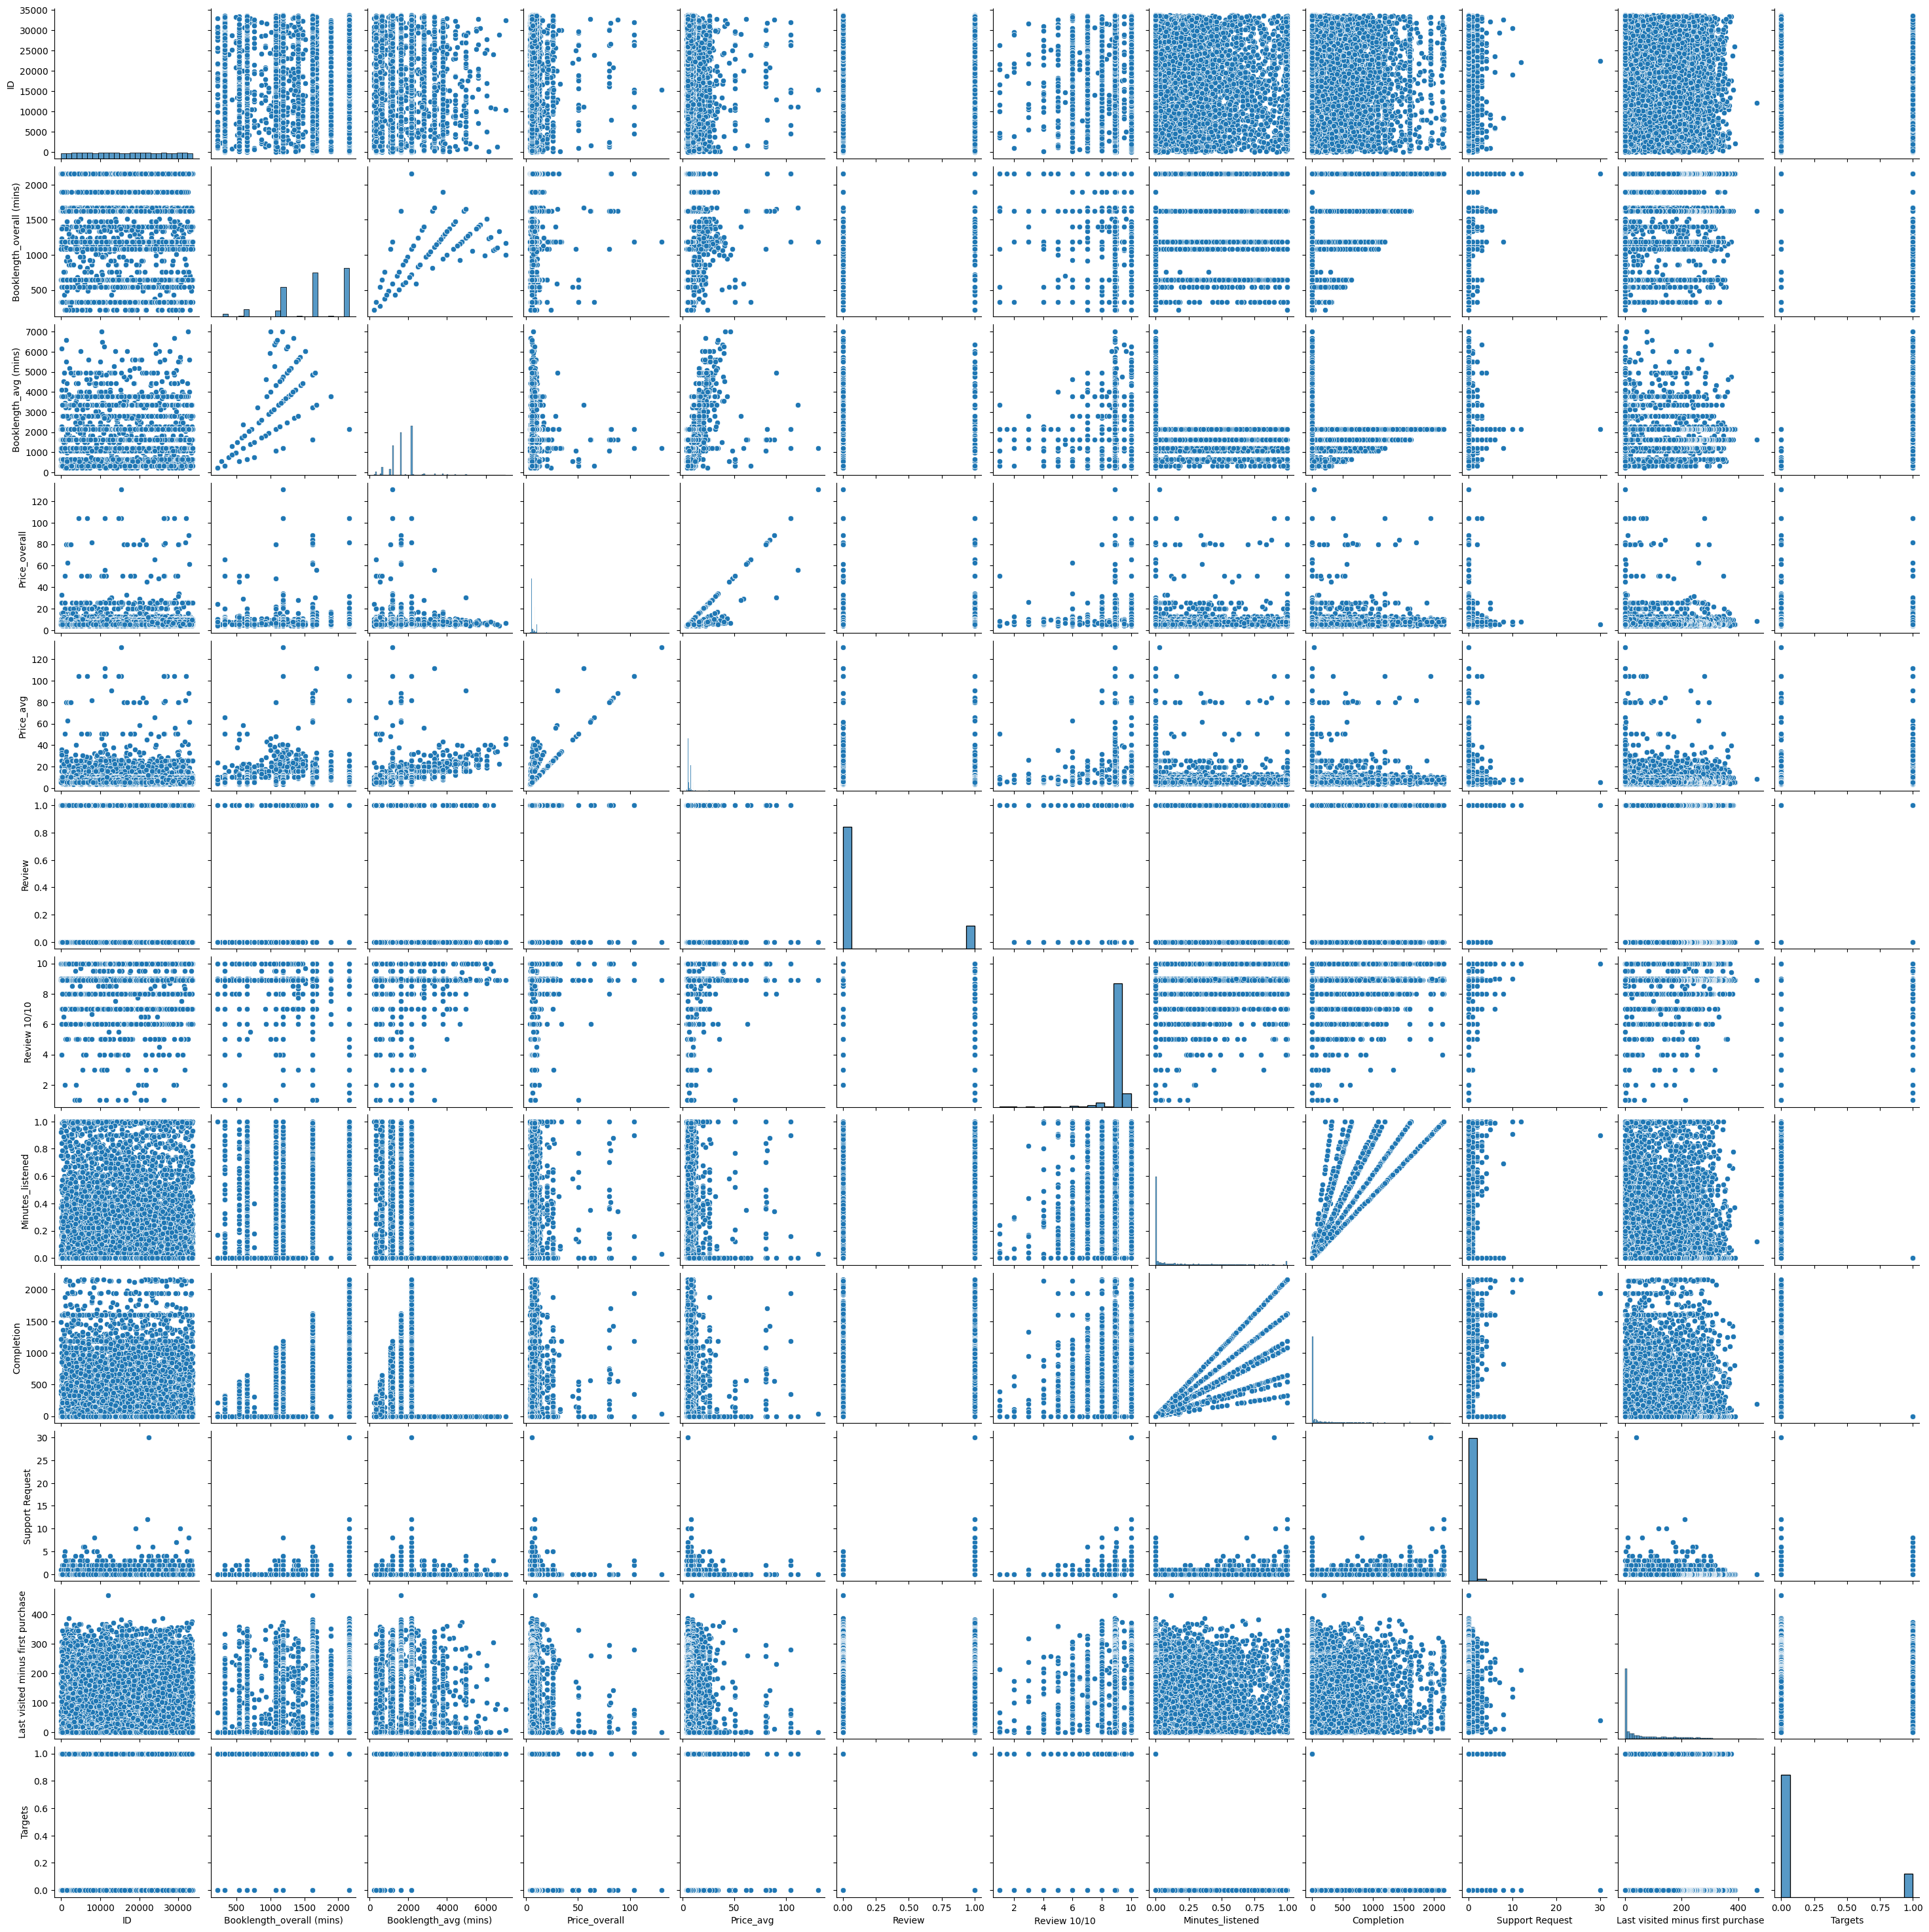

In [ ]:
sns.pairplot(data)
plt.show()

<ipython-input-19-70c94b2b27ac>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Minutes_listened', y='Completion', data=data, palette=palette, s=100)


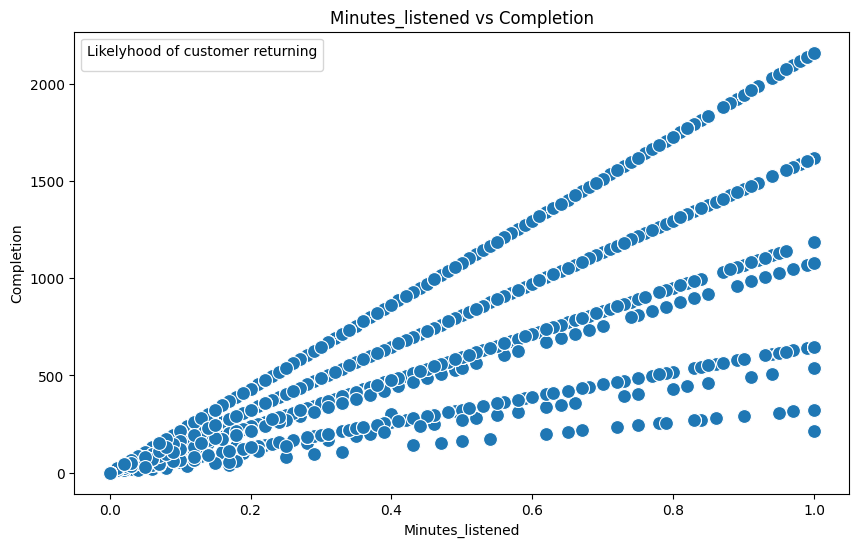

In [ ]:
plt.figure(figsize=(10,6))
palette={0: 'blue', 1: 'green', 2: 'red'}
sns.scatterplot(x='Minutes_listened', y='Completion', data=data, palette=palette, s=100)
plt.title('Minutes_listened vs Completion')
plt.xlabel('Minutes_listened')
plt.ylabel('Completion')
plt.legend(title='Likelyhood of customer returning')
plt.show()

VIF for Price_overall: 	    15.818
VIF for Price_avg: 	    15.325
VIF for Minutes_listened: 	     8.439
VIF for Completion: 	     8.358


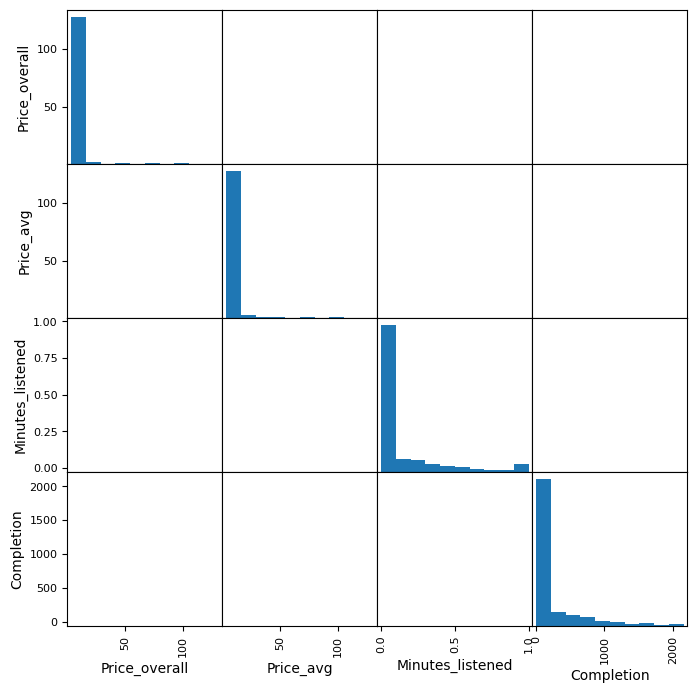

In [ ]:
import statsmodels.stats.outliers_influence as inf
predictors = ['Price_overall','Price_avg','Minutes_listened','Completion']
X = data[predictors]
pd.plotting.scatter_matrix(X, figsize=(8,8), alpha=0, marker='o', diagonal='hist')

#VIF
for i in range(X.shape[1]):
  vif = inf.variance_inflation_factor(X.values, i)#compute VIF
  print(f"VIF for {X.columns[i]}: \t{vif:10.3f}")

In [ ]:
#Multiple Linear Regression
from sklearn.metrics import r2_score
X = data[['Price_overall', 'Price_avg', 'Minutes_listened', 'Completion']]
X = sm.add_constant(X)  # Adds a constant column to input features to account for the intercept
y = data['Targets']

# Split the dataset into training and testing sets for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Train a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_scaled, y_train)

# Standardizing the test set
X_test_scaled = scaler.transform(X_test)

# Predicting 'alcohol' levels using the trained model
y_pred = linear_reg.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the model statistics
print(f"Coefficients: {linear_reg.coef_}")
print(f"Intercept: {linear_reg.intercept_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Coefficients: [ 0.         -0.29717103  0.34106059 -0.04394998 -0.02834397]
Intercept: 0.16046862518860383
Mean Squared Error (MSE): 0.10132904395311994
R-squared (R2): 0.21509693604922475


In [ ]:
#Multiple Logistic Regression
data['likelyhood_of_returning'] = 0
data.loc[data['Minutes_listened'] > data['Minutes_listened'].mean(), 'likelyhood_of_returning'] = 1

#5.2.2. Selecting a subset of the features
X = data[['Price_overall', 'Price_avg', 'Completion']]
X = sm.add_constant(X)  # Adds a constant column to input features to account for the intercept
y = data['Minutes_listened']

#5.2.3. Split the dataset in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#5.2.4. Fit a logistic regresion model
model = sm.Logit(y_train, X_train).fit()

#5.2.5. Display model summary
model.summary()

         Current function value: 0.140769
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Minutes_listened   No. Observations:                11267
Model:                          Logit   Df Residuals:                    11263
Method:                           MLE   Df Model:                            3
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                  0.4622
Time:                        20:32:27   Log-Likelihood:                -1586.0
converged:                      False   LL-Null:                       -2949.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.6108      0.076    -47.792      0.000      -3.759      -3.463
Price_overall     2.7902    127.272      0.022      0.983    -246.659     252.239
Price_avg        -2.7812    127.272     -0.022      0.983    -252.230     246.668
Completion        0.0047      0.000     44.232      0.000       0.004       0.005
=================================================================================
"""

In [ ]:
#	Linear Regression using Regularization. (TASK 3)

#5.3.1. Selecting a subset of the features
X = data[['Price_overall', 'Price_avg', 'Completion']]
X = sm.add_constant(X)  # Adds a constant column to input features to account for the intercept
y = data['Targets']

#5.3.2. Splitting the dataset into training and testing sets for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#5.3.3. Standardizing the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

#5.3.4. Standardizing the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()  # Reshape for a single feature

#5.3.5. Training a Lasso regression model using some alpha
lasso_reg = Lasso(alpha=0.05)
lasso_reg.fit(X_train_scaled, y_train_scaled)

#5.3.6. Predicting 'alcohol' levels using the trained Lasso regression model
y_pred_scaled = lasso_reg.predict(X_test_scaled)

#5.3.7. Reversing the scaling of predictions to original scale
y_pred_lasso = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

#5.3.8. Evaluating the model's performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

#5.3.9. Displaying the model statistics
print("Lasso Regression Model")
print(f"Coefficients: {lasso_reg.coef_}")
print(f"Intercept: {lasso_reg.intercept_}")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"R-squared (R2): {r2_lasso}")

Lasso Regression Model
Coefficients: [ 0.         -0.31126018  0.42841046 -0.16208005]
Intercept: -3.4663311268224506e-17
Mean Squared Error (MSE): 0.10957010887393992
R-squared (R2): 0.15126097299048413


In [ ]:
#Polynomial Regression (TASK 3)

#5.4.1. Selecting a subset of the features and target
X = data[['Price_overall', 'Price_avg', 'Completion']]
y = data['Targets']

#5.4.2. Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#5.4.3. Using a pipeline for 4th-degree polynomial regression
poly4_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # First, scale the features
    ('poly', PolynomialFeatures(degree=4)),  # Then, generate polynomial features
    ('linear', LinearRegression())  # Finally, apply linear regression
])

#5.4.4. Fit the pipeline on the training data
poly4_pipeline.fit(X_train, y_train)

#5.4.5.Predict on the test data
y_pred_poly4 = poly4_pipeline.predict(X_test)

#5.4.6.Calculate MSE
mse_poly4 = mean_squared_error(y_test, y_pred_poly4)

#5.4.7.Using a pipeline for 3rd-degree polynomial regression
poly3_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # First, scale the features
    ('poly', PolynomialFeatures(degree=3)),  # Then, generate polynomial features
    ('linear', LinearRegression())  # Finally, apply linear regression
])

#5.4.8.Fit the pipeline on the training data
poly3_pipeline.fit(X_train, y_train)

#5.4.9.Predict on the test data
y_pred_poly3 = poly3_pipeline.predict(X_test)

#5.4.10.Calculate MSE
mse_poly3 = mean_squared_error(y_test, y_pred_poly3)

#5.4.11.Print the MSE for both models
print(f"Mean Squared Error for 4th-degree Polynomial: {mse_poly4:.2f}")
print(f"Mean Squared Error for 3rd-degree Polynomial: {mse_poly3:.2f}")


Mean Squared Error for 4th-degree Polynomial: 0.09
Mean Squared Error for 3rd-degree Polynomial: 0.09


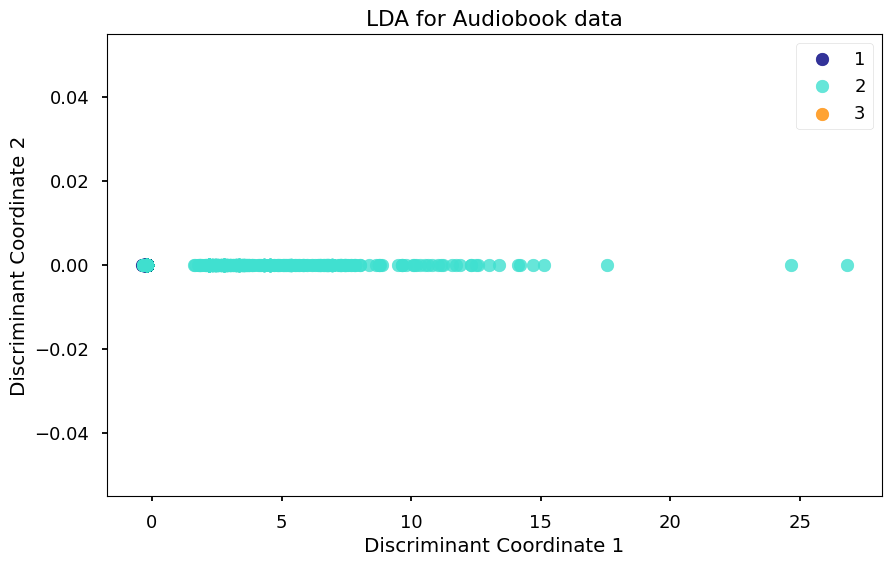

In [ ]:
#5.5. LDA - Linear Discriminant Analysis (TASK 1)
#5.5.2. Selecting a subset of the features
X = data[['Price_overall', 'Price_avg']]
X = sm.add_constant(X)  # Adds a constant column to input features to account for the intercept
y = data['Targets']

#5.5.3. Split the dataset in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#5.5.4. Fit an LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

#5.5.5. Transform the data using the fitted LDA in the new space
X_r_lda = lda.transform(X_train)

#5.5.6. Set the style and create the figure
target_names = ['1','2','3']     # Your classes name
with plt.style.context('seaborn-talk'):
    fig, ax = plt.subplots(figsize=[10,6])
    colors = ['navy', 'turquoise', 'darkorange']
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        ax.scatter(X_r_lda[y_train == i, 0], np.zeros_like(X_r_lda[y_train == i, 0]), alpha=.8, label=target_name, color=color)
    ax.set_title('LDA for Audiobook data')
    ax.set_xlabel('Discriminant Coordinate 1')
    ax.set_ylabel('Discriminant Coordinate 2')
    ax.legend(loc='best')
    plt.show()


Accuracy: 0.8874689385871495
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2388
           1       0.93      0.28      0.43       429

    accuracy                           0.89      2817
   macro avg       0.91      0.64      0.69      2817
weighted avg       0.89      0.89      0.86      2817



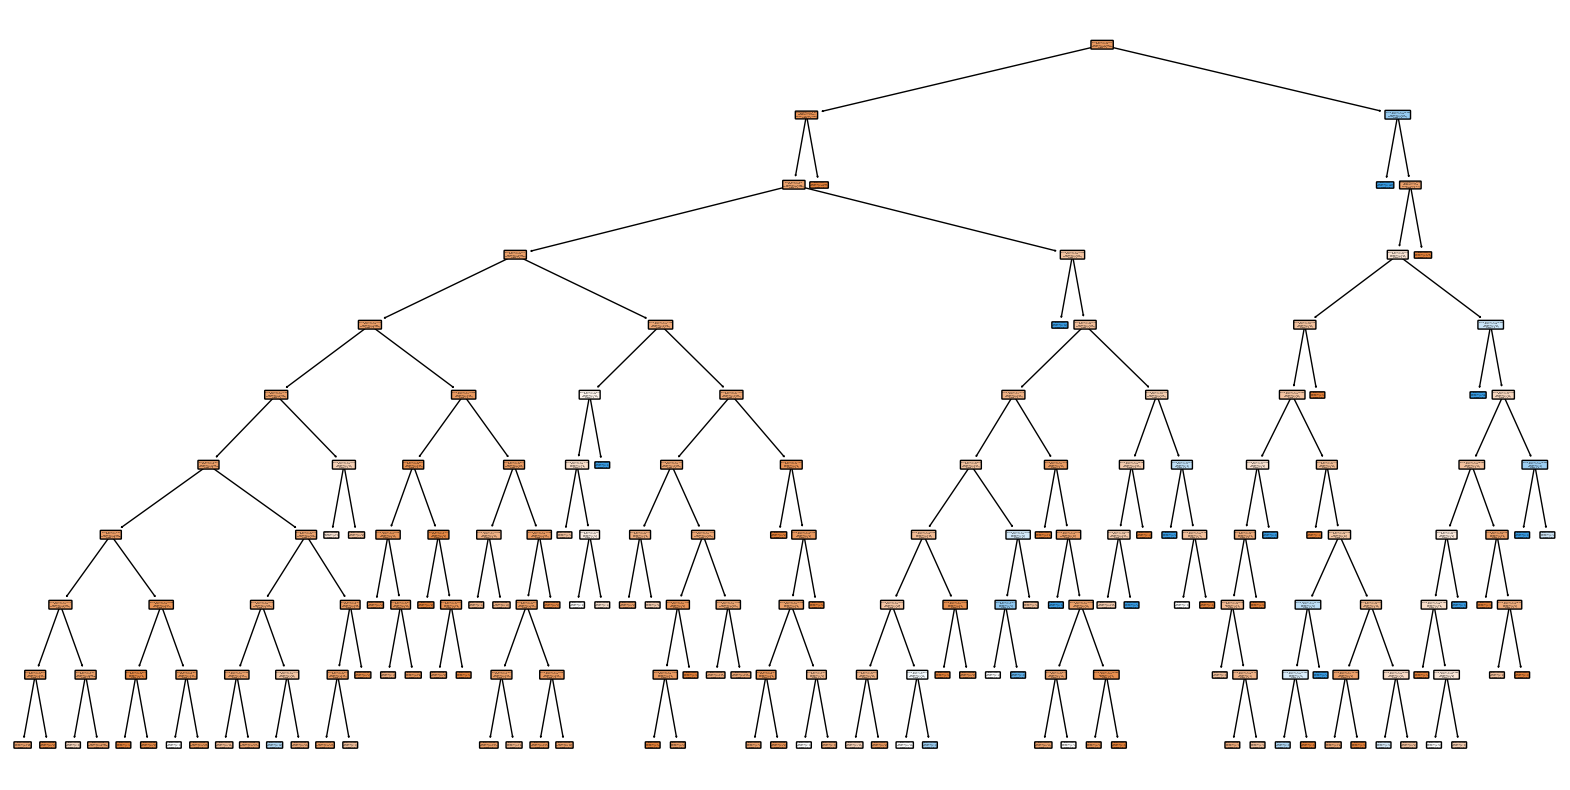

In [ ]:
#5.6.	Decision Tree for classification (TASK 1)

#5.6.1. Selecting a subset of the features
X = data[['Price_overall','Price_avg','Completion']]
#X = sm.add_constant(X)  # Adds a constant column to input features to account for the intercept
y = data['Targets']

#5.6.2. Split the dataset in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#5.6.3. Creating a Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth=10, random_state=42)

#5.6.4. Training the model
dtc.fit(X_train, y_train)

#5.6.5. Making predictions on the test data
y_pred = dtc.predict(X_test)

#5.6.6. Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#5.6.9. Print detailed classification metrics
print(classification_report(y_test, y_pred))

#5.6.10 Plotting the Decision Tree
feature_names = ['Price_overall', 'Price_avg', 'Completion']
class_names = ['1','2','3']
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=feature_names, class_names = class_names, rounded=True)
plt.show()

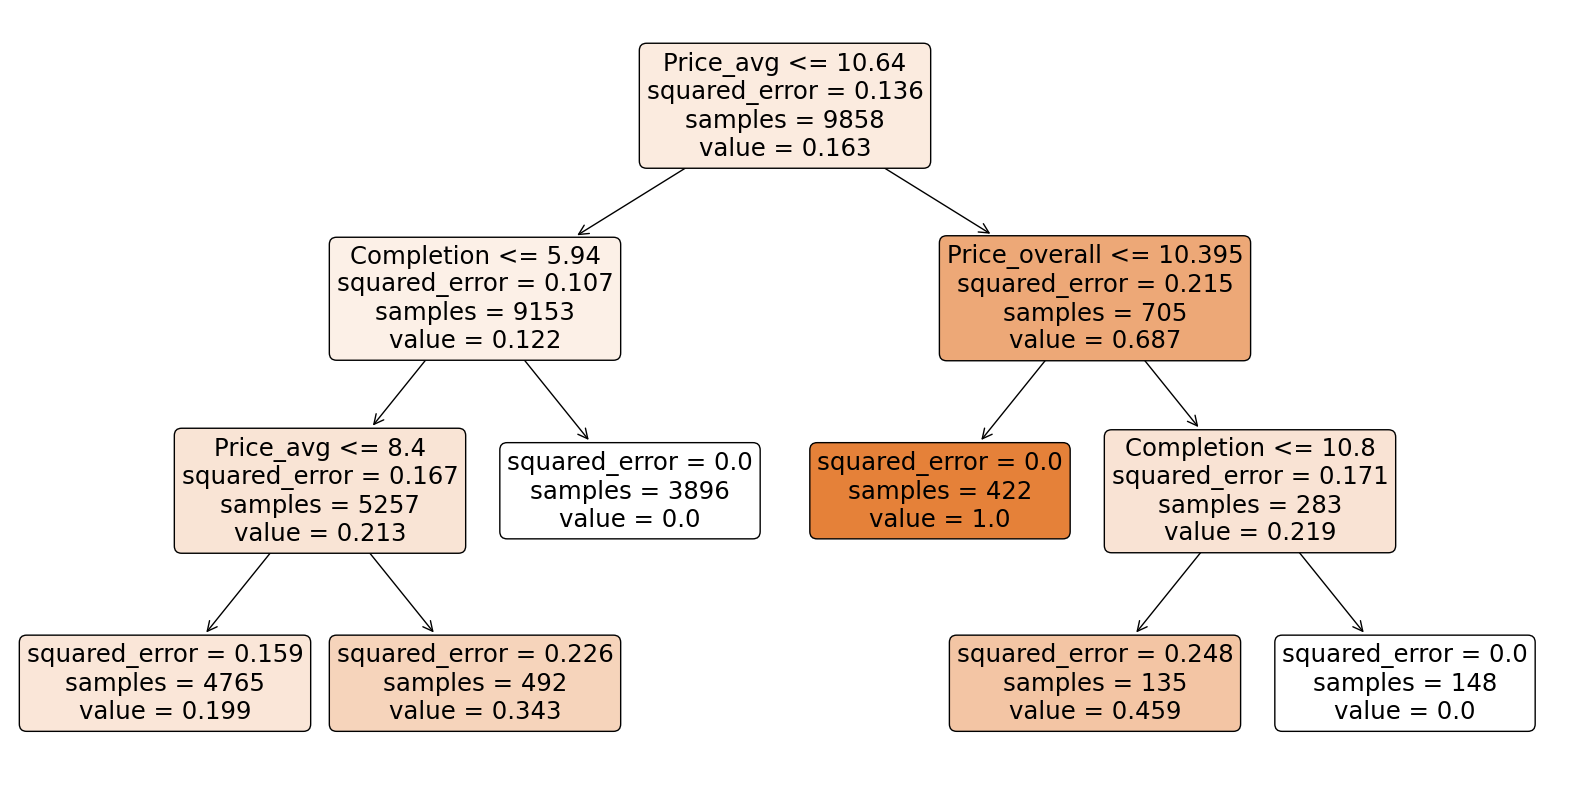

Decision Tree Regressor
Mean Squared Error (MSE): 0.08495569001651082
R-squared (R2): 0.3346313620282957


In [ ]:
#5.7.	Decision Tree for regression (TASK 3)

#5.3.1. Selecting a subset of the features
X = data[['Price_overall','Price_avg','Completion']]
#X = sm.add_constant(X)  # Adds a constant column to input features to account for the intercept
y = data['Targets']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=3, random_state=42)

# Training the model
regressor.fit(X_train, y_train)
feature_names = ['Price_overall','Price_avg','Completion']

# Plotting the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(regressor, filled=True, feature_names=feature_names, rounded=True)
plt.show()

# Predicting the alcohol levels in the test set
y_pred = regressor.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
# R-squared Value
r2 = r2_score(y_test, y_pred)

# Displaying the statistics
print(f"Decision Tree Regressor")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Accuracy: 0.8839190628328009
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2388
           1       0.86      0.28      0.43       429

    accuracy                           0.88      2817
   macro avg       0.87      0.64      0.68      2817
weighted avg       0.88      0.88      0.86      2817



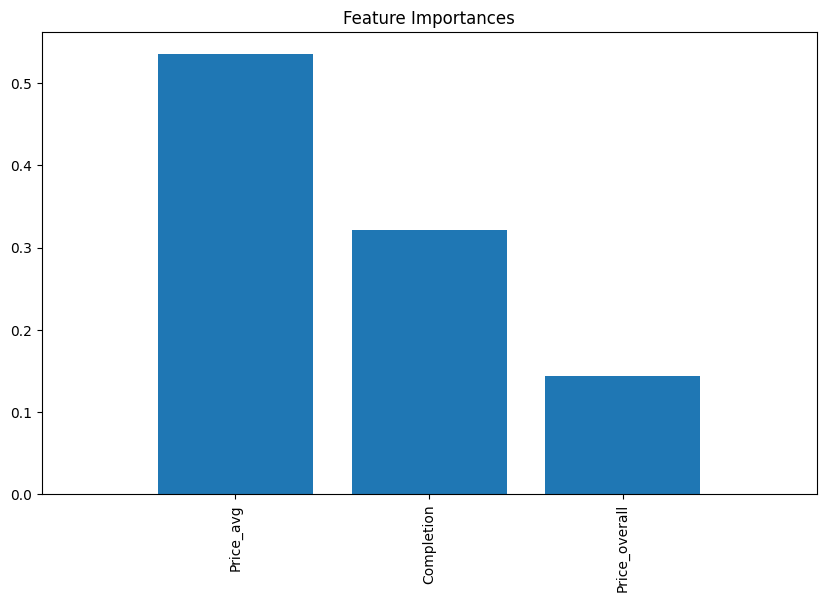

In [ ]:
#5.8.	Random Forest Classifier (TASK 1)

#5.8.1. Selecting a subset of the features
X = data[['Price_overall','Price_avg','Completion']]
#X = sm.add_constant(X)  # Adds a constant column to input features to account for the intercept
y = data['Targets']

#5.8.2. Split the dataset in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#5.8.3. Creating a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

#5.8.4. Training the model
clf.fit(X_train, y_train)

#5.8.5. Making predictions
y_pred = clf.predict(X_test)

#5.8.6. Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#5.8.7. Print detailed classification metrics
print(classification_report(y_test, y_pred))

#5.8.8. Feature importances
# Used to retrieve the importance of each feature in the dataset.
# It gives you a score for each feature, the higher the score, the more relevant.
# Measures how much each feature contributes to decreasing the weighted impurity in a tree
# or in other words how much the model's predictions depend on this feature.
feature_importances = clf.feature_importances_
features = ['Price_overall','Price_avg','Completion']
indices = np.argsort(feature_importances)[::-1]

#5.8.9. Plotting Feature Importances
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
#5.9.	Support Vector Machines (TASK 2)

#5.9.1. Create a binary category
data['likelyhood_of_returning'] = 0 # Create a new column 'alcohol_level' initialized with zeros
data.loc[data['Minutes_listened'] > data['Minutes_listened'].mean(), 'likelyhood_of_returning'] = 1  # Set 'alcohol_level' to 1 when 'alcohol' is above the mean

#5.9.2. Selecting a subset of the features
X = data[['Price_overall','Price_avg','Completion']]
X = sm.add_constant(X)  # Adds a constant column to input features to account for the intercept
y = data['likelyhood_of_returning']

#5.9.3. Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#5.9.4. Create a SVM Classifier with a radial basis function kernel
svm_model = SVC(kernel='linear', C=100)  # High C value can lead to overfitting

#5.9.5. Train the model using the training sets
svm_model.fit(X_train, y_train)

#5.9.6. Predict the response for test dataset
y_pred = svm_model.predict(X_test)

#5.9.7. Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2388
           1       1.00      0.28      0.43       429

    accuracy                           0.89      2817
   macro avg       0.94      0.64      0.69      2817
weighted avg       0.90      0.89      0.86      2817



In [ ]:
#5.10.	K-means - Unsupervised Learning (TASK 1 and TASK 2)

#5.10.1. We need to load some useful functions
# Function for cluster profiling
def cluster_profiling(X, labels, feature_names):
    data = pd.DataFrame(X, columns=feature_names)
    data['Cluster'] = labels
    profile = data.groupby('Cluster').mean()
    return profile

# Function for calculating feature importance
def feature_importance(kmeans, feature_names):
    centroids = kmeans.cluster_centers_
    importance = pd.DataFrame(centroids, columns=feature_names).abs()
    return importance

# Function for cluster validation using silhouette score
def cluster_validation(X, y, labels):
    return silhouette_score(X, labels)

# Anomaly detection function
def anomaly_detection(X, kmeans):
    distances = cdist(X, kmeans.cluster_centers_, 'euclidean')    # Euclidean distance between each point and all centroids
    distance_to_nearest_centroid = np.min(distances, axis=1)      # Assigning each point to its nearest centroid
    outlier_threshold = np.percentile(distance_to_nearest_centroid, 95) # Finds the distance threshold to the centroid for 95% of the data points
    anomaly_indices = np.where(distance_to_nearest_centroid > outlier_threshold)[0] # Filter in the form of indices
    return anomaly_indices


#5.10.2. Selecting a subset of the features
X = data[['Price_overall','Price_avg','Completion']]
y = data['Targets']

#5.10.3. Split the dataset in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#5.10.4. Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

#5.10.5. Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

#5.10.6. Cluster Profiling
feature_names = ['Price_overall','Price_avg','Completion']
profile = cluster_profiling(X_scaled, labels, feature_names)
print("Cluster Profiling: (Predictor mean by clusters)\n", profile)

#5.10.7. Feature Importance
importance = feature_importance(kmeans, feature_names)
print("\nFeature Importance: (Just absolute values)\n", importance)

#5.10.8. Evaluate cluster quality
silhouette_avg = cluster_validation(X_scaled, y_train, labels)
davies_bouldin = davies_bouldin_score(X_scaled, labels)
print("\nCluster Validation Metrics:")
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Score:", davies_bouldin)

#5.10.9. Anomaly Detection
anomaly_indices = anomaly_detection(X_scaled, kmeans)
print("\nAnomaly Detection: (Distance threshold to the centroid for 95% of the data points)")
print("Indices of Anomalies in the Original Dataset:", anomaly_indices)

# Filter the original DataFrame to get the data of the detected anomalies
anomalies = pd.DataFrame(X, columns=feature_names).iloc[anomaly_indices]
print("\nData of Detected Anomalies:\n", anomalies)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Profiling: (Predictor mean by clusters)
          Price_overall  Price_avg  Completion
Cluster                                      
0             0.060961  -0.025676    2.071383
1            -0.073774  -0.053326   -0.359117
2            13.160280  12.015705    0.367386

Feature Importance: (Just absolute values)
    Price_overall  Price_avg  Completion
0       0.060961   0.025676    2.071383
1       0.073774   0.053326    0.359117
2      13.160280  12.015705    0.367386

Cluster Validation Metrics:
Silhouette Score: 0.6511544104653644
Davies-Bouldin Score: 0.5812534455861645

Anomaly Detection: (Distance threshold to the centroid for 95% of the data points)
Indices of Anomalies in the Original Dataset: [    1    27    47    65    86   107   116   132   133   171   180   183
   191   209   238   248   253   266   270   300   354   366   396   411
   421   427   428   429   451   467   492   496   497   499   532   577
   608   769   789   815   828   845   899   920   950  1010

# Step 6

In [ ]:
#6.1.	Evaluate model performance using k-fold cross-validation.

# 6.1.1. LDA model cross-validation - TASK 1
# a) Selecting a subset of the features
X = data[['Price_overall','Price_avg','Completion']]
X = sm.add_constant(X)  # Adds a constant column to input features to account for the intercept
y = data['Targets']

# b) Create an LDA model
lda = LinearDiscriminantAnalysis()

# c) Define a 5-fold cross-validation strategy
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

# d) Evaluate model performance using cross-validation
cv_scores = cross_val_score(lda, X, y, cv=cv_strategy, scoring='accuracy')

# e) Print results
print(f"Cross-validation scores for each fold: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")
print(f"Standard deviation of cross-validation scores: {cv_scores.std()}")

Cross-validation scores for each fold: [0.88959886 0.89776358 0.87930422 0.88462904 0.88316761]
Mean cross-validation score: 0.8868926636573402
Standard deviation of cross-validation scores: 0.006357432108436636


In [ ]:
# 6.1.2. Decision tree model cross-validation - TASK 1
# a) Selecting a subset of the features
X = data[['Price_overall','Price_avg','Completion']]
y = data['Targets']

# b) Create a Decision Tree Classifier
classifier = DecisionTreeClassifier(max_depth=10, random_state=42)

# c) Define a 5-fold cross-validation strategy
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

# d) Evaluate model performance using cross-validation
cv_scores = cross_val_score(classifier, X, y, cv=cv_strategy, scoring='accuracy')

# e) Output the results of the cross-validation
print(f"Cross-validation scores for each fold: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")
print(f"Standard deviation of cross-validation scores: {cv_scores.std()}")

Cross-validation scores for each fold: [0.88746894 0.89172879 0.8771743  0.88533901 0.88103693]
Mean cross-validation score: 0.8845495943863556
Standard deviation of cross-validation scores: 0.005048175447200671


In [ ]:
# 6.1.3. Multiple Logistic Regression model cross-validation - TASK 2

# a) Selecting a subset of the features and creating a binary category
X = data[['Price_overall','Price_avg','Completion']]
X = sm.add_constant(X)  # Adds a constant column to input features
y = (data['Targets'] > data['Targets'].mean()).astype(int)  # Create a binary category

# b) Define a 5-fold cross-validation strategy
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# c) Initialize list to store cross-validation results
accuracies = []

# d) Perform k-fold cross-validation
for train_idx, test_idx in cv.split(X):
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit the model
    model = Logit(y_train, X_train).fit(disp=0)

    # Predict probabilities
    y_pred_prob = model.predict(X_test)

    # Convert probabilities to binary predictions
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Fold Accuracy: {accuracy:.4f}")

# e) Calculate the mean accuracy and standard deviation across all folds
mean_accuracy = np.mean(accuracies)
std_deviation = np.std(accuracies)

# f) Output the mean accuracy and standard deviation
print(f"\nMean Cross-validation Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation Between Folds: {std_deviation:.4f}")


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fold Accuracy: 0.8896


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fold Accuracy: 0.8949
Fold Accuracy: 0.8789


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Fold Accuracy: 0.8850
Fold Accuracy: 0.8839

Mean Cross-validation Accuracy: 0.8865
Standard Deviation Between Folds: 0.0054


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#6.1.4.	Support Vector Machines model crossvalidation - TASK 2

# a) Selecting a subset of the features and creating a binary category
X = data[['Price_overall','Price_avg','Completion']]
X = sm.add_constant(X)  # Adds a constant column to input features
y = (data['Minutes_listened'] > data['Minutes_listened'].mean()).astype(int)  # Create a binary category

# b) Create a pipeline that first standardizes the features then applies SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', C=100)) ])

# c) Define a 5-fold cross-validation strategy
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# d) Perform k-fold cross-validation
cv_scores = cross_val_score(svm_pipeline, X, y, cv=cv, scoring='accuracy')

# e) Print cross-validation results
print("Cross-validation scores for each fold:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())
print("Standard deviation between folds:", cv_scores.std())


Cross-validation scores for each fold: [0.98154065 0.97657082 0.97834576 0.97941072 0.98011364]
Mean cross-validation accuracy: 0.979196316197115
Standard deviation between folds: 0.0016733205145851178


In [ ]:
#6.1.4.	Linear Regression using Lasso Regularization with crossvalidation. (TASK 3)

# Selecting a subset of the features and adding a constant
X = data[['Price_overall','Price_avg','Completion']]
X = sm.add_constant(X)
y = data['Minutes_listened']

# Splitting the dataset into training and testing sets for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardizing the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()  # Reshape for a single feature

# Creating and training a Lasso regression model with cross-validation to find the best alpha
lasso_cv = LassoCV(alphas=np.logspace(-6, 1, 10), cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train_scaled)

# Predicting 'alcohol' levels using the trained Lasso regression model
y_pred_scaled = lasso_cv.predict(X_test_scaled)

# Reversing the scaling of predictions to the original scale
y_pred_lasso = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Evaluating the model's performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Displaying the model statistics
print("Lasso Regression Model with Cross-Validation")
print(f"Chosen Alpha: {lasso_cv.alpha_}")
print(f"Coefficients: {lasso_cv.coef_}")
print(f"Intercept: {lasso_cv.intercept_}")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"R-squared (R2): {r2_lasso}")

Lasso Regression Model with Cross-Validation
Chosen Alpha: 3.5938136638046256e-05
Coefficients: [ 0.          0.0321714  -0.02242336  0.9197825 ]
Intercept: -2.5430067351337432e-17
Mean Squared Error (MSE): 0.008548914455409723
R-squared (R2): 0.8495065420802271


In [ ]:
#Step 7. DEPLOYMENT PHASE
#7.1.	Make predictions and classifications with new data
#       Decision Tree Classifier - TASK 1
#       Logistic Regression - TASK 2
#       Lasso Regression Model - TASK 3

#7.1.1. Manually building df_new based on the sampled data
df_new = pd.DataFrame({
    'Price_overall': [5.10, 5.24, 4.60, 5.70, 4.68],  # example values
    'Price_avg': [3.03, 2.65, 0.50, 3.25, 2.00],  # example values
    'Completion': [1.66, 1.25, 0.75, 2.38, 1.04],  # example values

})
X_new = df_new[['Price_overall', 'Price_avg', 'Completion']]

# 7.1.2. Decision Tree Classifier - TASK 1
y_pred_dt = dtc.predict(X_new)
#print("TASK 1 - Decision Tree Predictions:\n", y_pred_dt)

# 7.1.3. Logistic Regression - TASK 2
X_new = sm.add_constant(X_new)
y_pred_lr = model.predict(X_new)
#print("TASK 2 - Logistic Regression Predictions:\n", y_pred_lr)

# 7.1.4. Lasso Regression Model - TASK 3
# Ensure to scale new data as per the trained model's scaling
X_new_scaled = scaler_X.transform(X_new)  # Use the same scaler used during training
y_pred_lasso = lasso_reg.predict(X_new_scaled)
y_pred_lasso_actual = scaler_y.inverse_transform(y_pred_lasso.reshape(-1, 1)).flatten()  # If the output was scaled
#print("TASK 3 - Lasso Regression Predictions:\n", y_pred_lasso_actual)

# 7.1.5. Printing results
#Header
print(f"{'':<6} {'Decision Tree':<15} {'Logistic Regression':<20} {'Lasso Regression':<15}")
print(f"{'Index':<6} {'Task 1':<15} {'Task 2':<20} {'Task 3':<15}")

# Rows of the table
for index, (dt, lr, lasso) in enumerate(zip(y_pred_dt, y_pred_lr, y_pred_lasso_actual)):
    print(f"{index:<6} {dt:<15} {lr:<20.2f} {lasso:<15.3f}")

       Decision Tree   Logistic Regression  Lasso Regression
Index  Task 1          Task 2               Task 3         
0      0               0.00                 0.094          
1      0               0.00                 0.085          
2      0               0.00                 0.056          
3      0               0.00                 0.089          
4      0               0.00                 0.082          
